# Activity: Perform logistic regression 

## Introduction

In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [1]:
# Standard operational package imports.
import pandas as pd
import numpy as np

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import logit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

### Load the dataset

The dataset **Invistico_Airline.csv** is loaded. The resulting pandas DataFrame is saved as a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows

Output the first 10 rows of data.

In [3]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [5]:
# Number of customers
df_original['satisfaction'].value_counts().to_frame()

,satisfaction
satisfied,71087
dissatisfied,58793


In [6]:
# Percentage of customers
df_original['satisfaction'].value_counts(normalize=True).apply(lambda x: (x*100)).to_frame()

,satisfaction
satisfied,54.73283
dissatisfied,45.26717


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` function. To examine how many NaN values there are, set the `dropna` parameter passed in to this function to `False`.

</details>

**Question:** How many satisfied and dissatisfied customers were there?

**Answer:**

There are 71087 customers `satisfied` and 58793 who were `dissatisfied`. 	

**Question:** What percentage of customers were satisfied?

**Answer:**

Accordingly, 54.73% customers satisfied while 45.27% customers weren't satisfied.

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [7]:
df_original.isna().sum().to_frame(name='Missing_Values')

,Missing_Values
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?

**Answer:**

We should remove 393 rows from `Arrival Delay in Minutes` because this is a small number compared to 129,880 rows in the dataset, which accounts for only 0.003%

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

*Bonus Numpy Axes, Explained: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

In [8]:
df_subset = df_original.dropna(axis=0)
df_subset.isna().any().to_frame(name='Has Null')

,Has Null
satisfaction,False
Customer Type,False
Age,False
Type of Travel,False
Class,False
Flight Distance,False
Seat comfort,False
Departure/Arrival time convenient,False
Food and drink,False
Gate location,False


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [9]:
df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)

<details>
    
  <summary><h4><strong>Hint 1</strong></h4></summary>
Use the `.astype()` function with the dictionary `{"Inflight entertainment": float}` as an input.

</details>

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [10]:
# This way
df_subset = pd.get_dummies(df_subset, columns=['satisfaction'], drop_first=True).rename(columns={'satisfaction_satisfied':'satisfaction'})
df_subset.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,1
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,1
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,1
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,1
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,1


In [11]:
# Or this way is fine
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()
df_subset.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,1.0
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,1.0
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,1.0
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,1.0
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,1.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `OneHotEncoder()` from `sklearn.preprocessing`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call `OneHotEncoder()`, specifying the `drop` argument as `'first'` in order to remove redundant columns from the output. 

Call `.fit_transform()`, passing in the subset of the data that you want to encode (the subset consisting of `satisfaction`). 

Call `.toarray()` in order to convert the sparse matrix that `.fit_transform()` returns into an array.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Index `df_subset` with a double pair of square brackets to get a DataFrame that consists of just `satisfaction`.

After getting the encoded values, update the `satisfaction` column (you can use reassignment).

</details>

### Output the first 10 rows of `df_subset`

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of `df_subset`.

In [12]:
df_subset.head(10)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,1.0
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,1.0
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,1.0
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,1.0
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,1.0
5,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,...,2,5,4,5,5,4,2,0,0.0,1.0
6,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,...,5,5,0,5,5,5,3,17,15.0,1.0
7,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,...,2,3,3,4,5,4,2,0,0.0,1.0
8,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,...,4,4,0,1,5,4,4,0,0.0,1.0
9,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,...,2,2,4,5,3,4,2,30,26.0,1.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are outputted, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [13]:
X = df_subset[['Inflight entertainment']]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=18101999)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If you named your independent variable `X` and your dependent variable `y`, then it would be `train_test_split(X, y, test_size=0.30, random_state=42)`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

When you use `train_test_split`, pass in `42` to `random_state`. `random_state` is used so that if other data professionals run this code, they can get the same exact train test split. If you use a different random state, your results will differ. </details>

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

**Answer:**

Other variables, like `Departure Delay in Minutes` seem like they can be potentially influential to customer satisfaction. This is why only using one independent variable might not be ideal.

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [14]:
model = LogisticRegression()


model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `LogisticRegression()` and the `fit()` function on the training set. `LogisticRegression().fit(X_train,y_train)`.

</details>

### Obtain parameter estimates
Make sure you output the two parameters from your model. 

In [15]:
model.coef_

array([[0.99365212]])

In [16]:
model.intercept_

array([-3.18370844])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content on [obtaining the parameter estimates](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/XCLzq/construct-a-logistic-regression-model-with-python) from a logistic regression model.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call attributes to obtain the coefficient and intercept estimates.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `.coef_` and `.intercept_`

</details>

In [17]:
# Bonus way using from statsmodels.formula.api import logit

# Concatenate the training features and target variable along columns (axis=1)
train_data = pd.concat([X_train, y_train], axis=1)

# Rename 'Inflight entertainment' to 'Inflight_entertainment' for statsmodel to understand
train_data = train_data.rename(columns={'Inflight entertainment':'Inflight_entertainment'})

# Initialize the logistic regression model using the formula 
formula = "satisfaction ~ Inflight_entertainment"
LOGIT = logit(formula=formula, data=train_data)

# Fit the model to the training data
result = LOGIT.fit()

# Display the summary of the logistic regression model
result.summary()

Optimization terminated successfully.
         Current function value: 0.536651
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                90640
Model:                          Logit   Df Residuals:                    90638
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.2208
Time:                        18:18:37   Log-Likelihood:                -48642.
converged:                       True   LL-Null:                       -62429.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.1837      0.026   -122.286      0.000      -3.235      -3.133
Inflight_entertainment     0.9937      0.007    138.068      0.000       0.980       1.008
==========================================================================================
"""

### Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

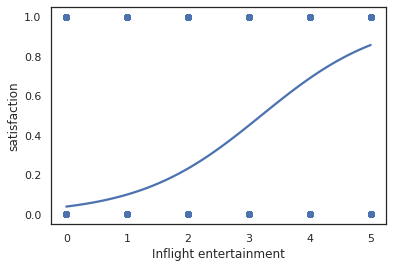

In [25]:
sns.regplot(data=df_subset, x='Inflight entertainment', y='satisfaction', logistic=True, ci=None);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the seaborn library that can plot data and a logistic regression model fit.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `regplot` function.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Set the `logistic` parameter passed in to this function to `True` to estimate a logistic regression model.

</details>

**Question:** What can you tell from the graph?

**Answer:**

The graph seems to indicate that the higher the `inflight entertainment` value, the higher the customer `satisfaction`, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as `Inflight entertainment` is categorical. 


## Step 4. Results and evaluation


### Predict the outcome for the test dataset

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the `predict` function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [19]:
### YOUR CODE HERE ###

y_pred = model.predict(X_test)

### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [20]:
prediction = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
prediction

,y_test,y_pred
92724,1.0,1.0
13951,0.0,1.0
7672,1.0,1.0
39466,1.0,1.0
85727,1.0,1.0
...,...,...
2189,1.0,1.0
70917,0.0,0.0
76769,1.0,0.0
1800,0.0,0.0


### Use the `predict_proba` and `predict` functions on `X_test`

In [26]:
# Use predict_proba to output a probability.

model.predict_proba(X_test)

array([[0.14374194, 0.85625806],
       [0.14374194, 0.85625806],
       [0.14374194, 0.85625806],
       ...,
       [0.76788449, 0.23211551],
       [0.899353  , 0.100647  ],
       [0.31197544, 0.68802456]])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Using the `predict_proba` function on `X_test` will produce the probability that each observation is a 0 or 1. 

</details>

In [27]:
# Use predict to output 0's and 1's.

model.predict(X_test)

array([1., 1., 1., ..., 0., 0., 1.])

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

`clf.predict` outputs an array of 0's and 1's, where 0's are satisfied and 1's are not satisfied. 

</details>

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [31]:
# Calculate Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Calculate Precision
precision = metrics.precision_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")

# Calculate Recall
recall = metrics.recall_score(y_test, y_pred)
print(f"Recall: {recall:.3f}")

# Calculate F1 Score
f1_score = metrics.f1_score(y_test, y_pred)
print(f"F1 Score: {f1_score:.3f}")

Accuracy: 0.804
Precision: 0.819
Recall: 0.825
F1 Score: 0.822


**Interpretation:**

* **Accuracy:** The accuracy of 0.804 indicates that the model correctly predicted the satisfaction level for approximately 80.4% of the instances in the test set. This means that the model's predictions align with the actual satisfaction levels in the data for the majority of cases.
* **Precision:** With a precision of 0.819, the model is about 81.9% reliable when predicting that a passenger is satisfied based on the 'Inflight entertainment' feature. It means that when the model predicts a passenger to be satisfied, it is correct about 81.9% of the time.
* **Recall:** The recall score of 0.825 suggests that the model can identify about 82.5% of the passengers who are truly satisfied based on the 'Inflight entertainment' feature. It captures a significant portion of the actual satisfied passengers.
* **F1 Score:** The F1 Score of 0.822 is a combined measure of precision and recall. It indicates that the model has a balanced performance in identifying both satisfied passengers and avoiding false positives. The F1 Score is useful when there is an uneven class distribution or when both false positives and false negatives need to be considered.

Overall, the model has a good performance in predicting satisfaction based on the `Inflight entertainment` feature. The accuracy, precision, and recall scores are all high, which indicates that the model is able to correctly identify satisfied passengers and avoid making false positives. The F1 Score is also high, which suggests that the model has a balanced performance in both precision and recall.


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>  

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score`, and `metrics.f1_score` functions. 
    
</details> 

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

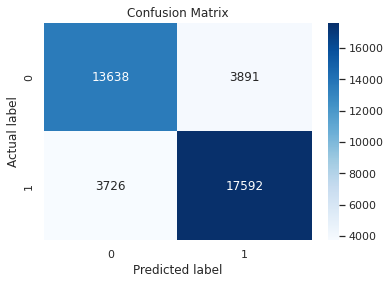

In [48]:
# One way to plot
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix');

Text(0.5, 1.0, 'Confusion Matrix')

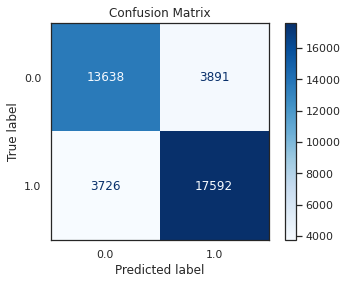

In [56]:
# Another default way from Google to plot
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

**Question:** What stands out to you about the confusion matrix?

**Answer:**

What stands out in this confusion matrix:

1. **Class Imbalance:** The confusion matrix for the model shows that there is some class imbalance in the data, with the `Satisfied` class having significantly more instances than the `Dissatisfied` class. This imbalance may affect the model's performance and should be taken into account during evaluation and model development.


2. **False Negatives and False Positives:** The number of False Negatives (3726) is relatively close to the number of False Positives (3891). This suggests that the model is making a similar number of errors in both directions.  
    - False Negatives represent cases where the model incorrectly predicts a passenger to be `Dissatisfied` when they are actually `Satisfied`.
    - False Positives represent cases where the model incorrectly predicts a passenger to be `Satisfied` when they are actually `Dissatisfied`. 
    - It's important to analyze and minimize both types of errors based on the specific problem's context and requirements.


3. **Overall Performance:** The model seems to have higher accuracy in predicting the `Satisfied` class (True Positives: 17,592) compared to the `Dissatisfied` class (True Negatives: 13,638). This suggests that the model is performing better in identifying satisfied passengers based on the `Inflight entertainment` feature.


4. The overall `accuracy` of the model is 80.4%. This is a good accuracy, but it could be improved by reducing the number of false positives and false negatives.



<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

**Answer:**

Answered in question above in 2.

**Question:** What do you think could be done to improve model performance?

**Answer:**

Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like `Departure Delay in Minutes,` seem like they could potentially influence customer satisfaction.

## Considerations

**What are some key takeaways that you learned from this lab?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating. 
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What findings would you share with others?**
*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives. 

**What would you recommend to stakeholders?**
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 